In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\jchen\\Documents\\Udemy\\Python'

In [2]:
movies = pd.read_csv("Movie-Ratings.csv")

In [3]:
len(movies)

559

In [7]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.columns = ['Film', 'Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [8]:
movies.info()
#year is int var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(2), int64(4)
memory usage: 43.9 KB


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
#treat film as categorical var
movies.Film = movies.Film.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(2), int64(4)
memory usage: 43.9 KB


In [11]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [12]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [13]:
movies.describe()
#will not show describe for categorical variables
#categorical here seems nominal variables only

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#turn on the edge color
plt.rcParams["patch.force_edgecolor"] = True

In [15]:
#Jointplots

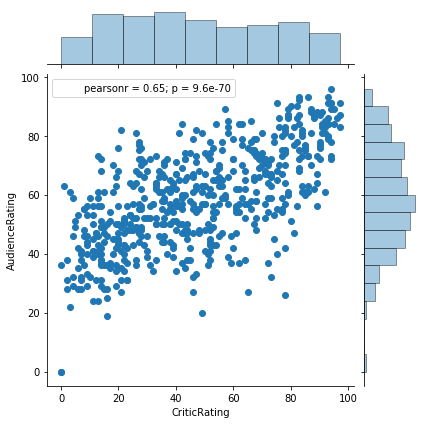

In [16]:
j = sns.jointplot(data=movies, x='CriticRating', y = 'AudienceRating')

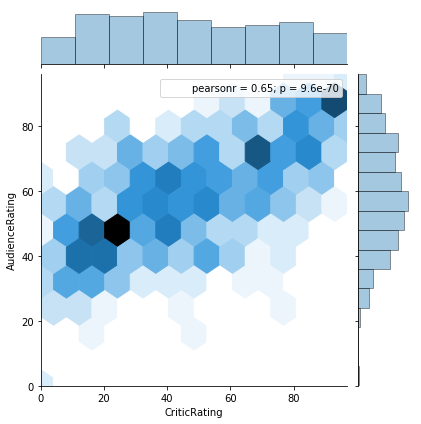

In [29]:
#shift + tab could pop out drop down menu
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

In [23]:
#<<< Chart1

------

In [24]:
#Histograms

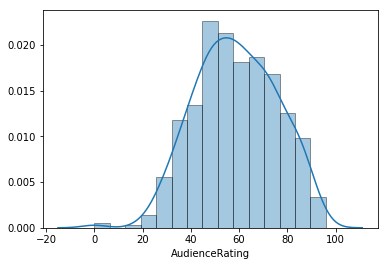

In [31]:
#already know this method:
m1 = sns.distplot(movies.AudienceRating, bins = 15)

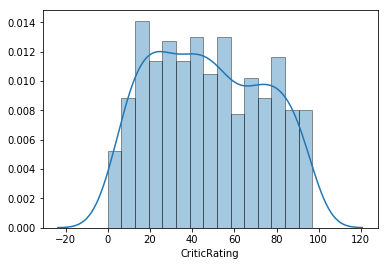

In [32]:
m2 = sns.distplot(movies.CriticRating, bins = 15)

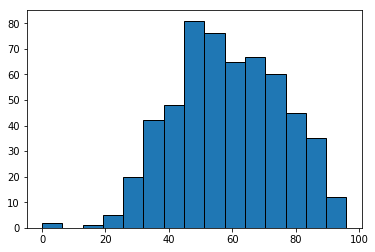

In [34]:
#<<< Chart 2
n1 = plt.hist(movies.AudienceRating, bins=15)

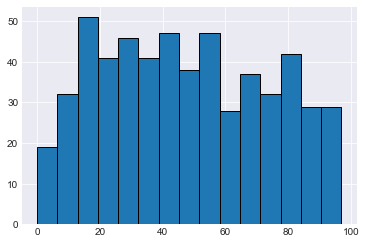

In [17]:
#sns.set_style("white")
sns.set_style("darkgrid")
n2 = plt.hist(movies.CriticRating, bins=15)

---

In [39]:
#<<< Chart 3
#Stacked Histograms

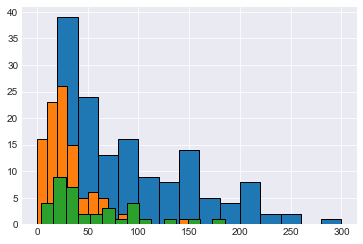

In [48]:
#movies[movies.Genre == 'Drama'].BudgeMillions
#plt.hist(movies.BudgeMillions)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions,bins=15)
plt.show()

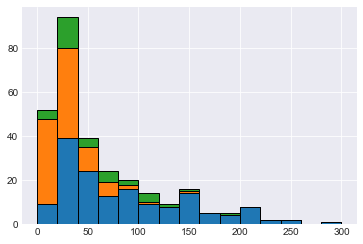

In [50]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
         movies[movies.Genre == 'Drama'].BudgetMillions,\
         movies[movies.Genre == 'Thriller'].BudgetMillions],bins=15, stacked=True)
plt.show()

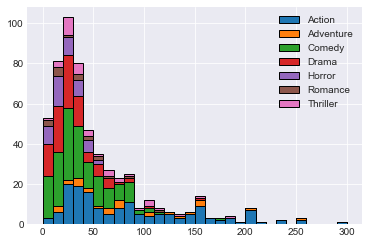

In [59]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    #print(gen)
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1,label=mylabels) 
plt.legend()
plt.show()

In [60]:
#<<< Chart 4
#KDE Plot

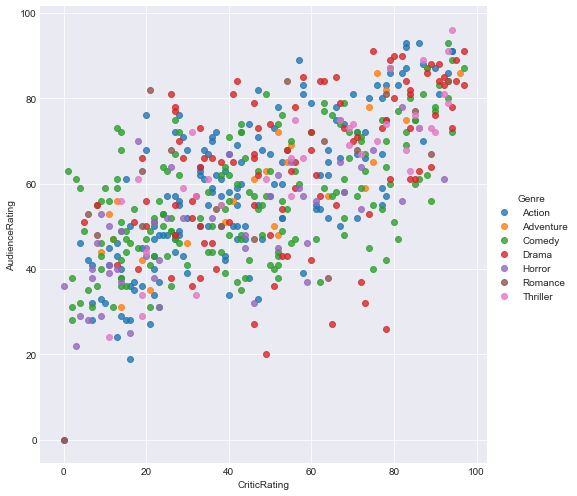

In [62]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue='Genre', size=7, aspect=1)

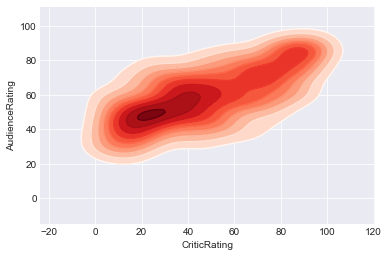

In [74]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Reds')
#Tips:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='Reds')

In [75]:
#Working with Subplots()

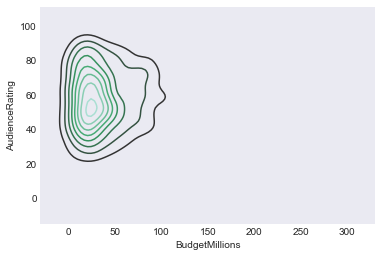

In [80]:
#kernel density estimate
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

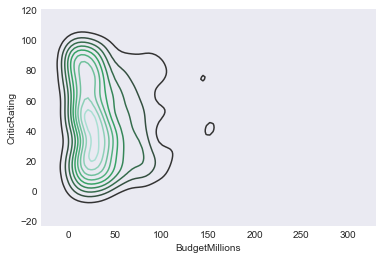

In [81]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

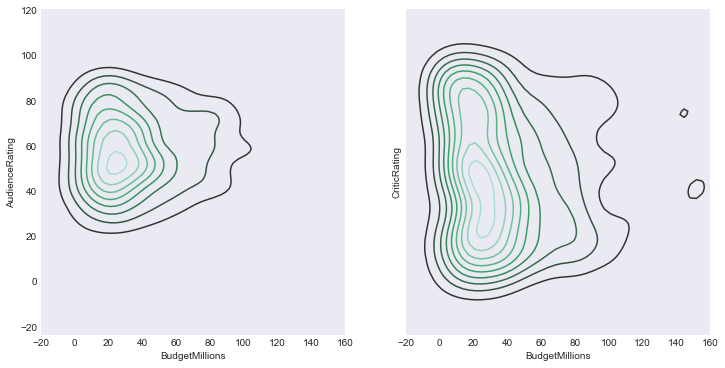

In [129]:
f, ax = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1])
k1.set(xlim=(-20,160))

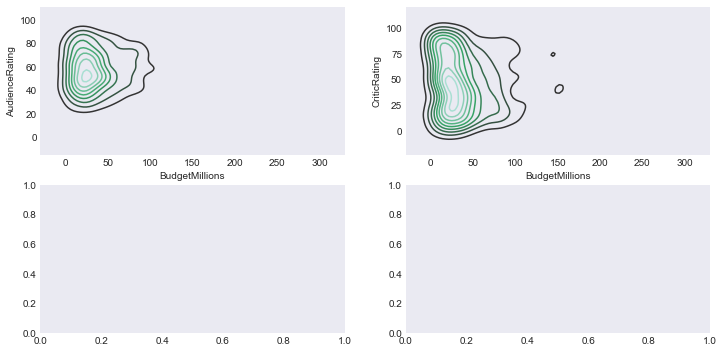

In [130]:
f, ax = plt.subplots(2,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])

In [95]:
#ViolinPlots

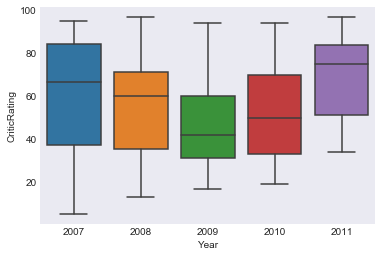

In [100]:
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

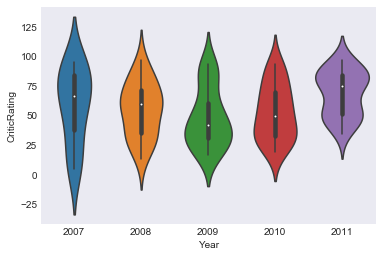

In [101]:
#z = sns.violinplot(data=movies, x='Genre', y='CriticRating')
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

In [103]:
#Creating a Facet Grid
#show density of scattle plot

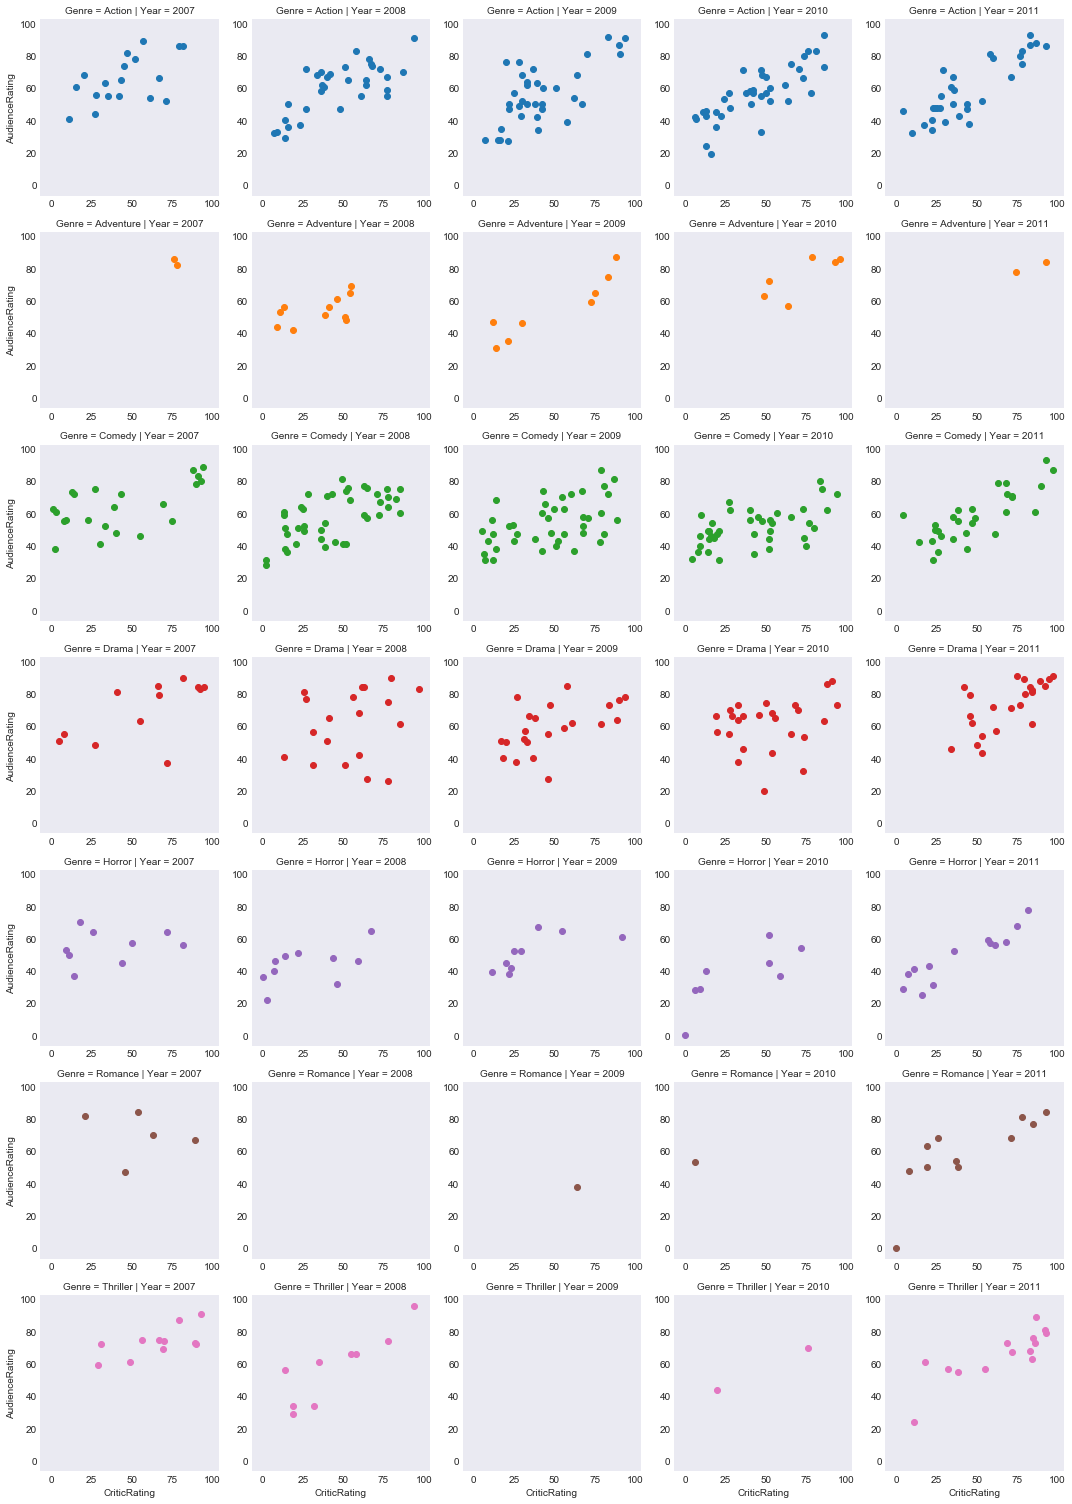

In [110]:
#g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
#g = g.map()
#plt.scatter(movies.CriticRating, movies.AudienceRating)
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

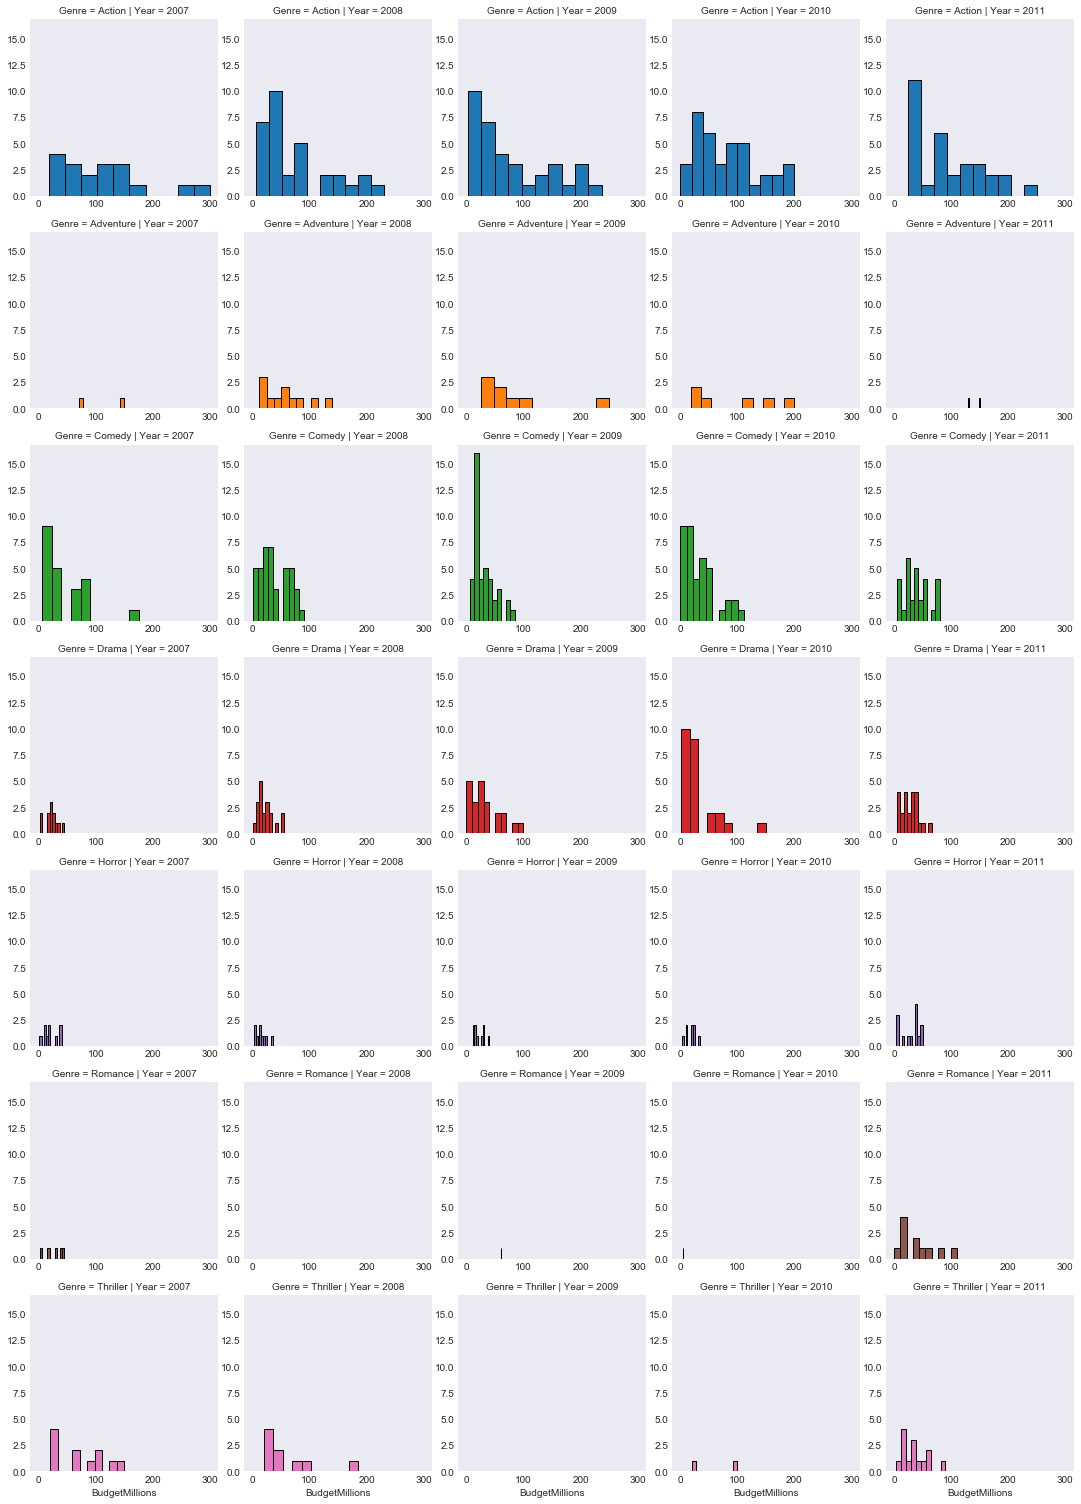

In [111]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

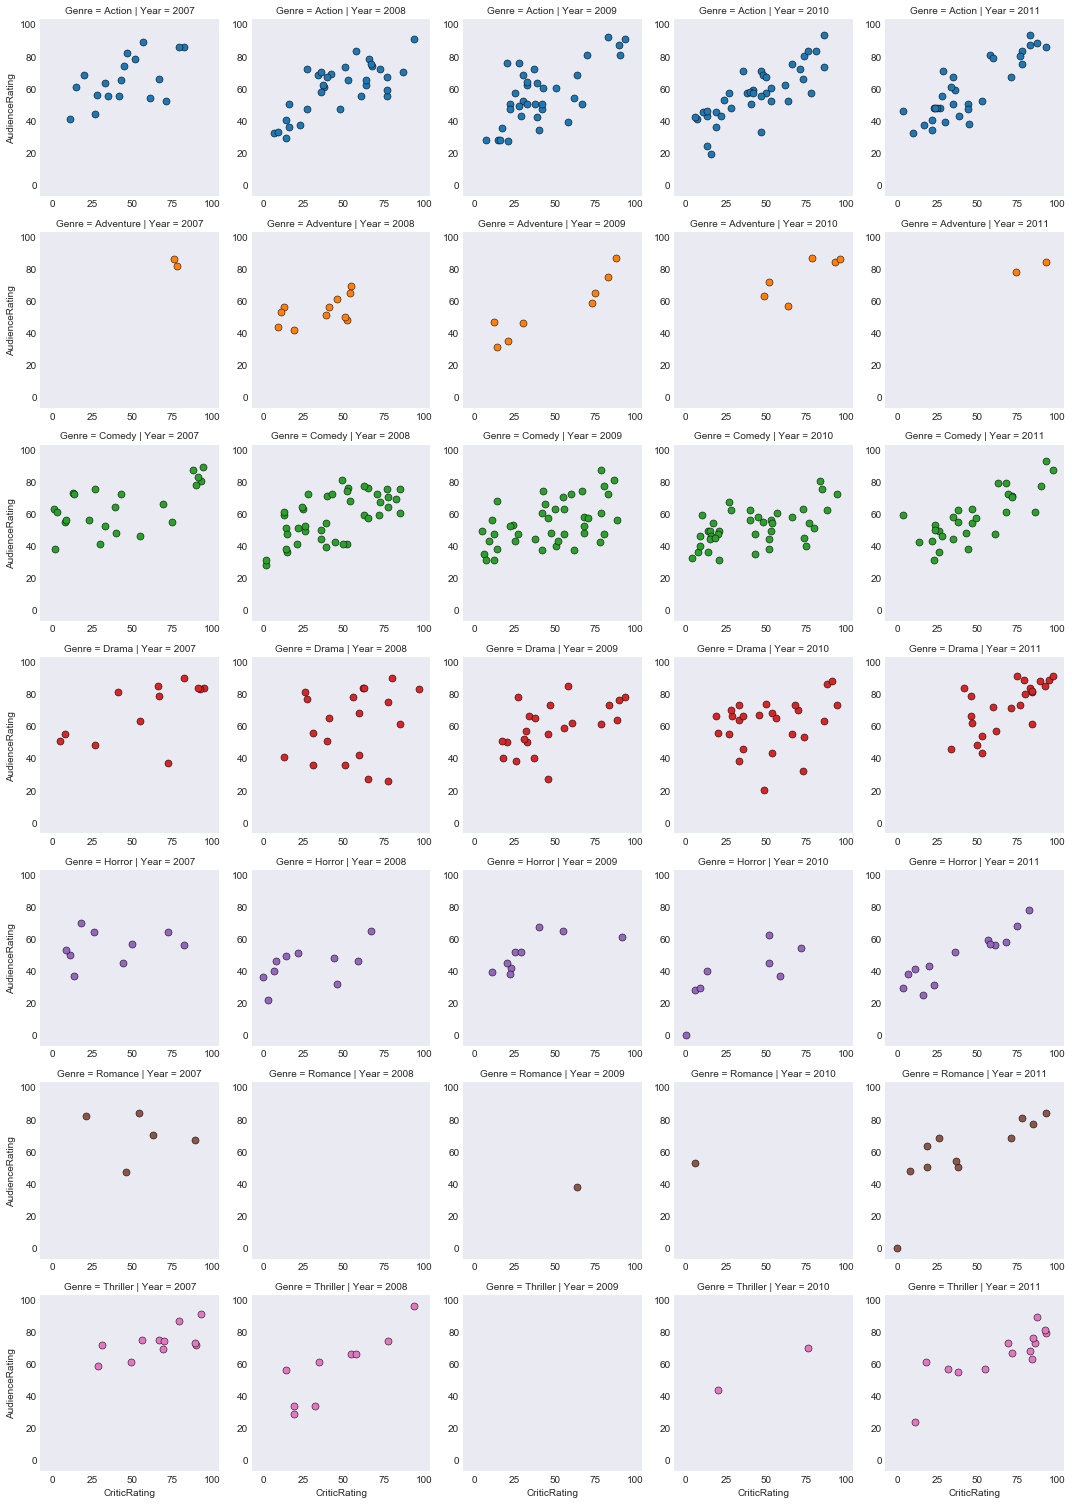

In [115]:
#back to the scatterplots:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws)

In [114]:
kws

{'edgecolor': 'black', 'linewidth': 0.5, 's': 50}

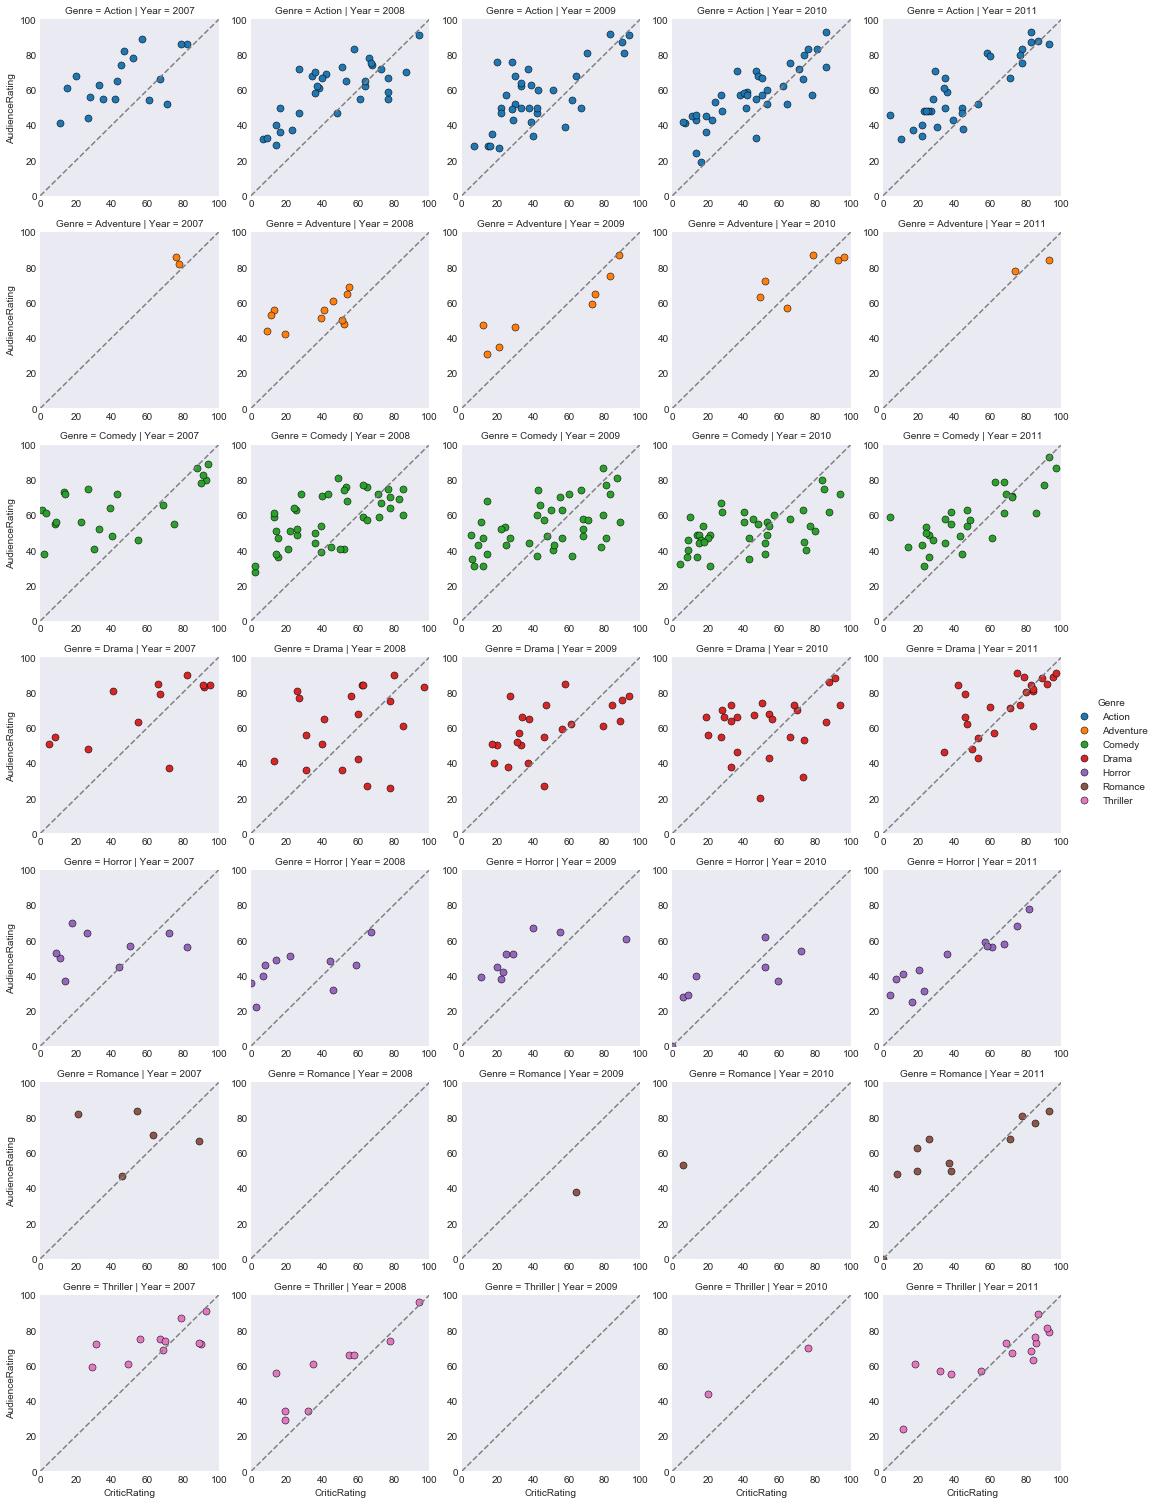

In [119]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()


In [120]:
#<<< CHART 5

-----------------

In [121]:
#Building Dashboards

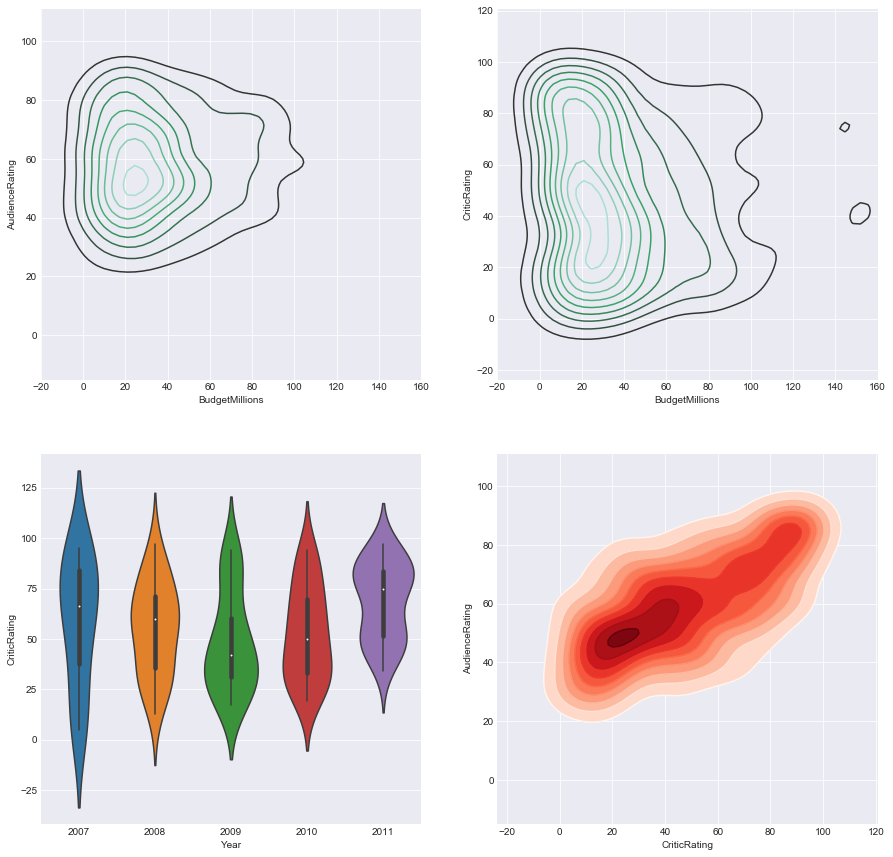

In [24]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=ax[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  shade=True, shade_lowest=False, cmap='Reds', ax=ax[1,1])
#non seaborn pic need be transformed into seaborn ax
#ax[1,1].hist([movies[movies.Genre == 'Action'].BudgetMillions,\
#          movies[movies.Genre == 'Drama'].BudgetMillions,\
#          movies[movies.Genre == 'Thriller'].BudgetMillions],bins=15, stacked=True)
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='Reds', ax=ax[1,1])
plt.show()

------

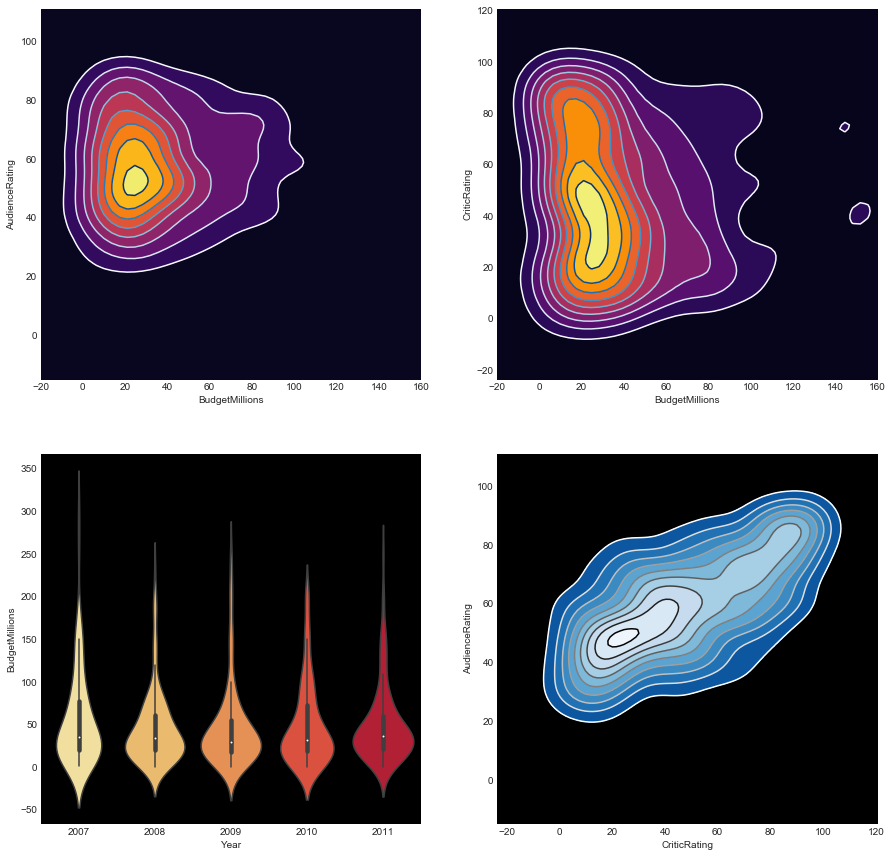

In [34]:
####styling tips
########################################################
#color tip
#set_style: darkgrid, white, whitegrid, dark, darkgrid, ticks
sns.set_style('dark', {'axes.facecolor':'black'})
f, ax = plt.subplots(2, 2, figsize=(15,15))
#plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True, \
                 cmap='inferno', ax=ax[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,\
                 cmap='Blues', ax=ax[0,0])
#plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=True, \
                 cmap='inferno', ax=ax[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='Blues', ax=ax[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
#plot[1,0]
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=ax[1,0], palette='YlOrRd')

#z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=ax[1,0])
#plot[1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  shade=True, shade_lowest=False, cmap='Blues_r', ax=ax[1,1])
 
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='gist_gray_r', ax=ax[1,1])
plt.show()

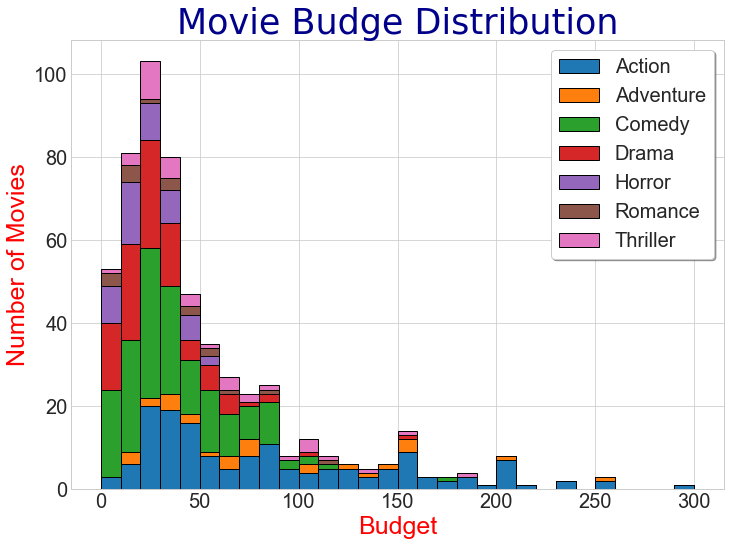

In [47]:
######################################
#Finish Touches
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    #print(gen)
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4
h = plt.hist(list1, bins=30, stacked=True, rwidth=1,label=mylabels) 
plt.title("Movie Budge Distribution", fontsize=35, color='DarkBlue', fontname='Console')
plt.ylabel('Number of Movies', fontsize=25, color='Red')
plt.xlabel('Budget', fontsize=25, color='Green')
plt.yticks(fontsize=20) #axis font size
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1,\
           prop={'size':20}) #prop:legend size to 20; frame:fancybox, shadow, framealpha
plt.show()